# About the dataset

#### In this we're having a advertising dataset in which there are advertising mediums (TV, Newspaper, Radio) and their respective sales. And, we have to make such model which predicts sales based on the money spent on different platforms for marketing.

#### For this, I build a linear regression model which predicts Sales using an appropriate predictor variable. And, the variable is one who is most correlated to more sales.

Importing libraries: The necessary libraries such as NumPy, Pandas, Seaborn, and Matplotlib are imported to perform data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset: The code reads the advertising dataset from a CSV file named "advertising.csv" using the Pandas library and assigns it to the variable **ds**. The **head()** function is then used to display the first few rows of the dataset.

In [2]:
ds = pd.read_csv("advertising.csv")
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Inspecting dataset: The code uses the **shape** attribute to check the dimensions (number of rows and columns) of the dataset and the **describe()** function to obtain statistical information about the dataset, such as mean, standard deviation, minimum, maximum, etc.

In [3]:
ds.shape

(200, 4)

In [4]:
ds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking for any missing values and categorical data: The **info()** function is used to check for any missing values and to determine the data types of the columns. In this case, there are no missing values, and all the values are of float datatype.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Exploratory Data Analysis: Exploratory Data Analysis: The code performs exploratory data analysis to understand the relationship between the advertising spending and sales. 

Finding outliers using Box Plot: The code creates a box plot for each advertising medium (TV, Radio, Newspaper) to visualize the distribution of advertising spending and identify any outliers. The **boxplot()** function from Matplotlib is used to create the box plots, and different colors are used to differentiate the boxes and outliers.

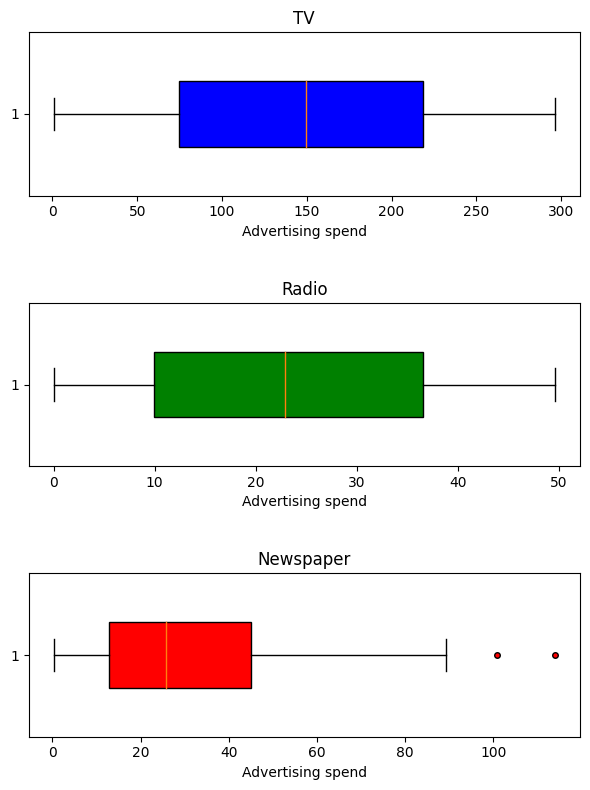

In [6]:
fig_row, axis_col = plt.subplots(3, 1, figsize=(6,8))

axis_col[0].boxplot(ds['TV'], vert=0, widths=0.4, patch_artist=True, boxprops={'facecolor' : 'blue'})
axis_col[0].set_title('TV')
axis_col[0].set_xlabel('Advertising spend')

axis_col[1].boxplot(ds['Radio'], vert=0, widths=0.4, patch_artist=1, boxprops={'facecolor' : 'green'})
axis_col[1].set_title('Radio')
axis_col[1].set_xlabel('Advertising spend')

# outliers = boxplot['fliers'][0]

# Customize outlier appearance
# outlier_marker = dict(marker='o', markerfacecolor='red', markersize=6)
# plt.setp(outliers, **outlier_marker)

axis_col[2].boxplot(ds['Newspaper'], vert=0, widths=0.4, patch_artist=1, boxprops={'facecolor' : 'red'}, flierprops={'marker':'.', 'markersize':8, 'markerfacecolor':'red'})
axis_col[2].set_title('Newspaper')
axis_col[2].set_xlabel('Advertising spend')

plt.tight_layout(h_pad=3)
plt.show()


# 'patch_artist=True' parameter to enable the filling of the boxes with color
# 'boxprops' parameter  (which expects the dictionary) is used to set the 'facecolor'
# 'flierprops' parameter is used for outliers

Sales through different mediums using Pie Chart: The code calculates the total sales for each advertising medium and then plots a pie chart to visualize the percentage contribution of each medium to the total sales.

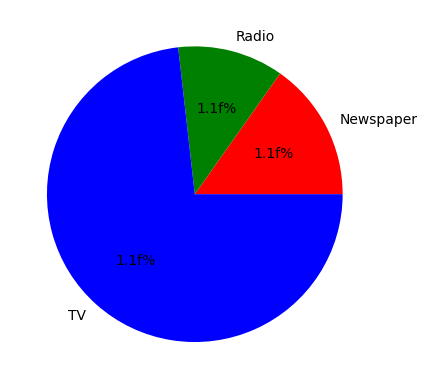

In [7]:
newspaper_sales = np.sum(ds['Newspaper'])
radio_sales = np.sum(ds['Radio'])
tv_sales = np.sum(ds['TV'])

total_sales = newspaper_sales + radio_sales + tv_sales

newspaper_percentage = (newspaper_sales / total_sales) * 100
radio_percentage = (radio_sales / total_sales) * 100
tv_percentage = (tv_sales / total_sales) * 100

labels = ['Newspaper', 'Radio', 'TV']
sizes = [newspaper_percentage, radio_percentage, tv_percentage]
colors=['red', 'green', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='1.1f%%')
plt.show()

# 'autopct' stands for "automatic percent"  used to specify the format of the percentage values displayed on the pie chart."

It includes univariate analysis (box plot for sales)

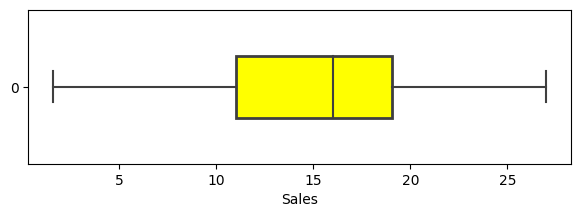

In [8]:
plt.figure(figsize=(7, 2))
sns.boxplot(ds['Sales'], boxprops={'facecolor':'yellow', 'linewidth': 2}, orient='h', width=0.4)
plt.xlabel('Sales')
plt.show()

It includes bivariate analysis (scatter plots between sales and each advertising medium) 

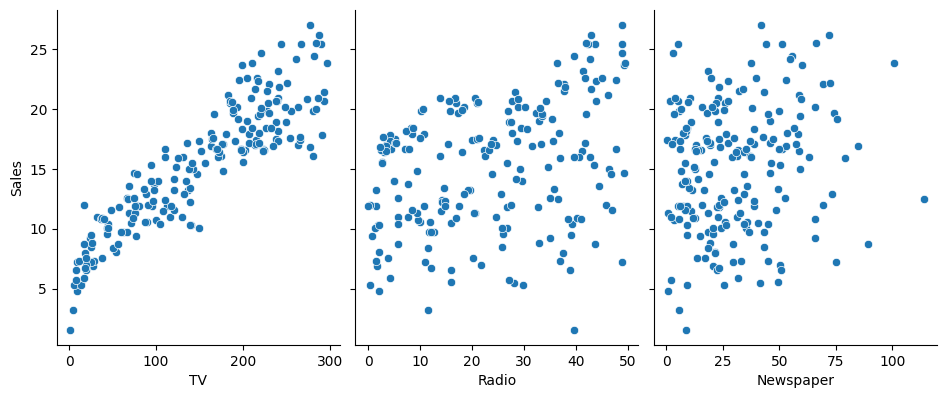

In [9]:
sns.pairplot(data=ds, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='scatter', aspect=.8, height=4)
plt.show()

Here, a correlation heatmap is created using the **corr()** function to visualize the correlation between variables.

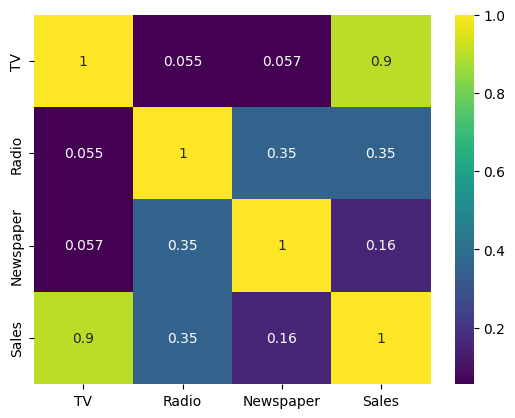

In [10]:
sns.heatmap(ds.corr(), cmap='viridis', annot=True)
plt.show()

#### Building Linear Regression Model: The code prepares the data for building a linear regression model.

It assigns the 'TV' column as the input feature (X) and the 'Sales' column as the target variable (y). Then, it splits the data into training and testing sets using the **train_test_split()** function

In [11]:
X = ds['TV']
y = ds['Sales']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

##### Adding constant to features of training dataset: This is required for the regression model to estimate the intercept term.

While fitting a linear regression model, when there is no intercept (or constant term) is included. Then  by default, it assumes that the line pass through the origin, meaning the intercept (or constant term) of the regression equation is set to zero. 


Now, we're manually adding a constant to the dataset using the **add_constant** attribute provided by **statsmodels**

In [15]:
import statsmodels.api as sm

X_train_with_intercept = sm.add_constant(X_train)

Fitting the best-fit line: The code fits a linear regression model using the Ordinary Least Squares (OLS) method by calling the **OLS()** function and then the **fit()** method. It provides the training data (X_train_with_intercept and y_train) to the model.

In [16]:
# Fitting regression line by calculating the coefficients of the regression equation.
lr_model = sm.OLS(y_train, X_train_with_intercept).fit()

# sm.OLS() takes
# Endogenous variable, also known as the dependent variable or response variable
# Exogenous variables, also known as independent variables, predictor variables, or explanatory variables

Statistics of Data: The code prints the coefficients of the regression equation using the **params** attribute and displays the summary statistics of the linear regression model using the **summary()** method.

In [17]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        02:19:46   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

Plotting Scatter plot with best-fit line for training data: The code plots a scatter plot of the training data points and overlays the best-fit line obtained from the regression model using the equation y = 6.948 + 0.054 * X_train.

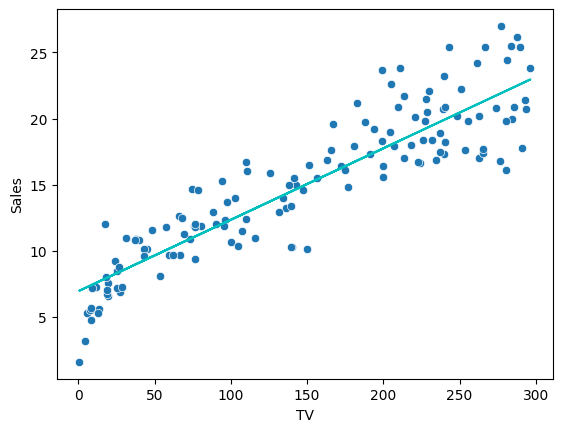

In [19]:
# plt.scatter(X_train, y_train)
sns.scatterplot(data=ds, x=X_train, y=y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'c')    # 'c' is for cyan colour for our best fit line
plt.show()

Predicting labels for training data: The code uses the trained model to make predictions on the training data (X_train_with_intercept) and assigns the predicted values to **y_train_pred**.

In [20]:
y_train_pred = lr_model.predict(X_train_with_intercept)

### Residual Errors

Finding residual error: The code calculates the residual error by subtracting the predicted values (y_train_pred) from the actual values (y_train).

In [21]:
res = (y_train - y_train_pred) # actual - predicted

Plotting Histogram for representing residual error: The code plots a histogram with a smoothing process known as kernel density estimation (KDE) curve to visualize the distribution of the residual errors.

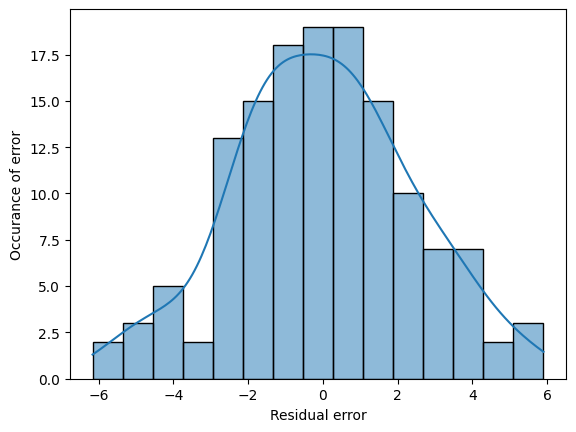

In [22]:
sns.histplot(res, bins=15, kde=True)

plt.xlabel("Residual error")
plt.ylabel("Occurance of error") # number of times each residual error value occurs.
plt.show()



Plotting Scatter Plot for representing residual error

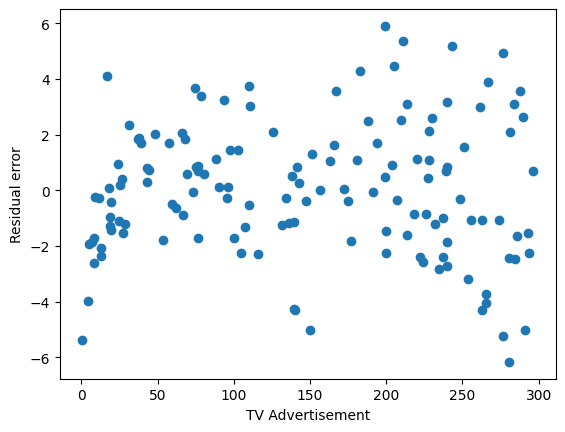

In [23]:
plt.scatter(X_train,res)

plt.xlabel("TV Advertisement")
plt.ylabel("Residual error")
plt.show()

Adding constant to features of test dataset

In [24]:
X_test_with_intercept = sm.add_constant(X_test)

Predicting labels for test data

In [25]:
# Predict the labels corresponding to X_test_with_intercept
y_pred = lr_model.predict(X_test_with_intercept)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

Performance metrics for the regression algorithm: The code calculates the root mean squared error (RMSE) and the R-squared (coefficient of determination) score to evaluate the performance of the regression model on the test data.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Here, we the square roor is to normalize the units as the predicted and actual values.

2.019296008966232

In [28]:
r2_score(y_test, y_pred)

0.792103160124566

Plotting Scatter plot with best-fit line for test data: The code plots a scatter plot of the test data points and overlays the best-fit line obtained from the regression model.

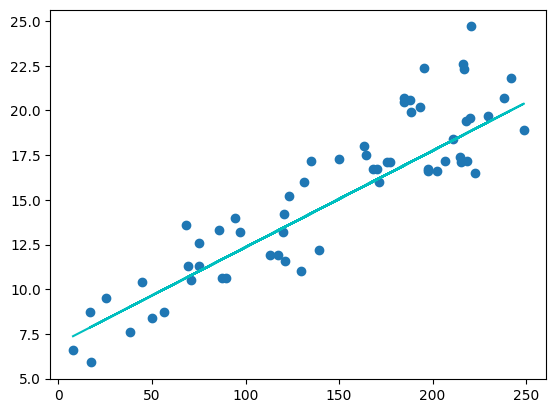

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'c')
plt.show()